# Проект: Анализ бизнес-показателей

Описание проекта:

Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
лог сервера с данными об их посещениях,
выгрузка их покупок за этот период,
рекламные расходы.

Вам предстоит изучить:
откуда приходят пользователи и какими устройствами они пользуются,
сколько стоит привлечение пользователей из различных рекламных каналов;
сколько денег приносит каждый клиент,
когда расходы на привлечение клиента окупаются,
какие факторы мешают привлечению клиентов.

**Цель исследования**:
1. Проанализировать маркетинговые рекламные каналы.
2. Оценить окупаемость рекламы.
3. Посчитать маркетинговые метрики.

**Ход исследования**:
1. Обзор данных.
2. Предобработка данных.
3. Расчет метрик.
4. Анализ маркетинга.
5. Написание общего вывода.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
sessions = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
expenses = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
sessions.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
sessions['Session Start'] = pd.to_datetime(sessions['Session Start'])
sessions['Session End'] = pd.to_datetime(sessions['Session End'])

In [5]:
sessions = sessions.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [6]:
sessions.duplicated().sum()

0

In [7]:
sessions = sessions.rename(columns={'User Id': 'user_id', 'Region' : 'region', 'Device' : 'device', 'Session Start' : 'session_start', 'Session End' : 'session_end', 'Channel' : 'channel'})

In [8]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


Дубликатов нет, пропусков нет

In [9]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [10]:
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])

In [11]:
orders = orders.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [12]:
orders.duplicated().sum()

0

In [13]:
orders = orders.rename(columns={'User Id': 'user_id', 'Event Dt' : 'event_dt', 'Revenue' : 'revenue'})

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


Дубликатов нет, пропусков нет

In [15]:
expenses.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [16]:
expenses['dt'] = pd.to_datetime(expenses['dt'])

In [17]:
expenses = expenses.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [18]:
expenses.duplicated().sum()
expenses = expenses.reset_index(drop=True)

In [19]:
expenses = expenses.rename(columns={'Channel': 'channel'})

In [20]:
expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


Дубликатов нет, пропусков нет

Переименовала столбцы, перевела тип данных в datetime

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [21]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, expenses):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')
    
    expenses['dt'] = expenses['dt'].dt.date

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    expenses = expenses.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    expenses['acquisition_cost'] = expenses['costs'] / expenses['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        expenses[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [22]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [23]:
# функция для расчёта конверсии

def get_conversion(
    sessions,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = sessions.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [24]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [25]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [26]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [27]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [28]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Заданы нужные функции

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

1. Определите минимальную и максимальную даты привлечения пользователей.

In [29]:
users_profile = get_profiles(sessions, orders, expenses) # Вызвала функцию профиля пользователя
users_profile

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,faceboom,iphone,united states,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iphone,france,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,adnonsense,pc,germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,united states,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,tiptop,iphone,united states,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,pc,uk,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,tiptop,iphone,united states,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,mediatornado,pc,united states,2019-09-28,2019-09-01,False,0.205714


In [30]:
print(users_profile['dt'].min())
print(users_profile['dt'].max())
users_profile['dt'].max() - users_profile['dt'].min() 

2019-05-01
2019-10-27


datetime.timedelta(days=179)

Минимальная дата привлечения 2019-05-01, максимальная 2019-10-27

2. Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [31]:
paying_users = users_profile[users_profile['payer'] == 1] # Создала таблицу с платящими пользователями
paying_users = paying_users.reset_index(drop=True)
paying_users

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,2019-05-01,True,1.088172
1,46006712,2019-06-30 03:46:29,adnonsense,android,france,2019-06-30,2019-06-01,True,1.008000
2,374052872,2019-08-08 15:42:57,tiptop,mac,united states,2019-08-08,2019-08-01,True,2.972222
3,414791703,2019-05-03 12:01:28,tiptop,iphone,united states,2019-05-03,2019-05-01,True,1.049180
4,785077127,2019-06-27 08:31:39,tiptop,mac,united states,2019-06-27,2019-06-01,True,2.539062
...,...,...,...,...,...,...,...,...,...
8876,999625937544,2019-10-26 06:24:00,yrabbit,android,united states,2019-10-26,2019-10-01,True,0.270000
8877,999645428220,2019-10-01 05:35:55,tiptop,mac,united states,2019-10-01,2019-10-01,True,3.570946
8878,999659859721,2019-09-04 10:33:02,organic,mac,france,2019-09-04,2019-09-01,True,0.000000
8879,999779032958,2019-07-04 10:56:11,tiptop,iphone,united states,2019-07-04,2019-07-01,True,2.620313


In [32]:
def paid_users_info(data):
    
    # Группировка по параметру data. Выявляем общее количество пользователей и долю платящих
    df1 = users_profile.groupby(data).agg({'payer':['count', 'mean']})
    df1.columns=['all_users', 'mean_users']
    df1 = df1.reset_index(drop = False)
    
    # Высчитываем количество платящих пользователей по параметру data
    df2 = users_profile.query("payer == True").groupby(data).agg({'payer':['count']})
    df2.columns=['paid_users']
    df2= df2.reset_index(drop = False)
    
    # Объединяме таблицы
    df3 = df1.merge(df2, how = 'left', on = data)
    df3 = df3.sort_values(by = 'paid_users', ascending = False).reset_index(drop = True)
    df3['mean_users'] = (df3['mean_users'] * 100).round(2)
    
    return df3

In [33]:
region_paid = paid_users_info('region')
region_paid

,region,all_users,mean_users,paid_users
0,united states,100002,6.90,6902
1,uk,17575,3.98,700
2,france,17450,3.80,663
3,germany,14981,4.11,616


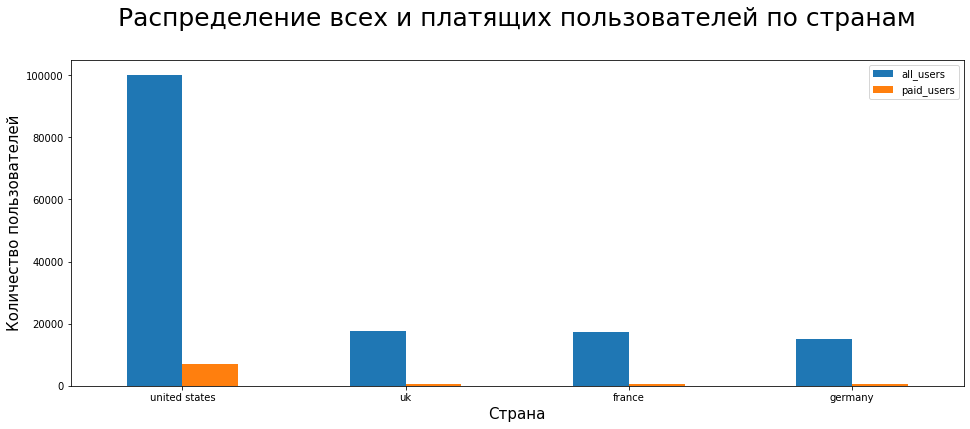

In [34]:
region_paid.plot(kind = 'bar', figsize = (16,6), rot = 0, legend = True, x = 'region', y = ['all_users','paid_users'])

plt.title("Распределение всех и платящих пользователей по странам\n", fontsize = 25)
plt.xlabel('Страна', fontsize = 15)
plt.ylabel('Количество пользователей', fontsize = 15)
plt.show()

Больше всего пользователей приходят из США (100002 пользователей), в ней же больше платящих пользователей (6902) и доля (6.9%)

Меньше всего пользователей приходят из Германии (14981), количество платящих - 616 пользователей, доля - 4.1%

3. Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [35]:
device_paid = paid_users_info('device')
device_paid

,device,all_users,mean_users,paid_users
0,iphone,54479,6.21,3382
1,android,35032,5.85,2050
2,mac,30042,6.36,1912
3,pc,30455,5.05,1537


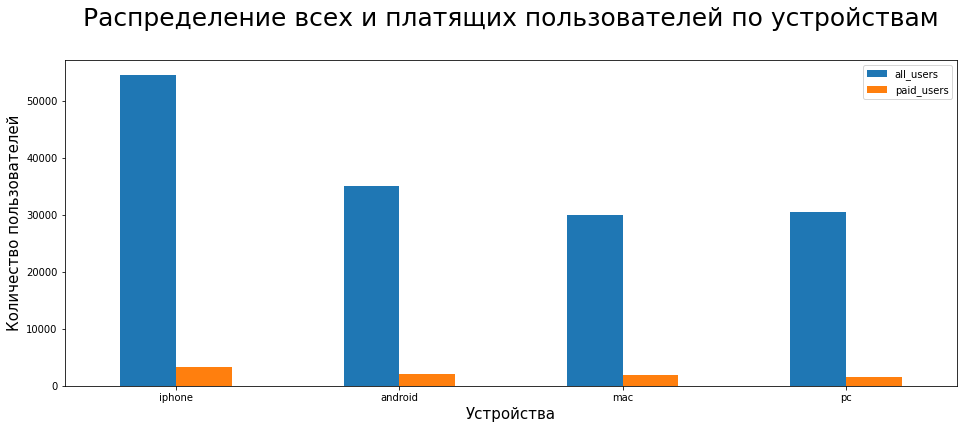

In [36]:
device_paid.plot(kind = 'bar', figsize = (16,6), rot = 0, legend = True, x = 'device', y = ['all_users','paid_users'])

plt.title("Распределение всех и платящих пользователей по устройствам\n", fontsize = 25)
plt.xlabel('Устройства', fontsize = 15)
plt.ylabel('Количество пользователей', fontsize = 15)
plt.show()

Больше всего пользователей приходят из устройств iPhone (54479 пользователей), в ней же больше платящих пользователей (3382) с долей 6.2% 

Меньше всего пользователей приходят из устройств PC (30455), количество платящих - 1537 пользователей, доля - 5%

4. Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [37]:
channel_paid = paid_users_info('channel')
channel_paid.sort_values(by='paid_users')

,channel,all_users,mean_users,paid_users
10,mediatornado,4364,3.57,156
9,yrabbit,4312,3.83,165
8,lambdamediaads,2149,10.47,225
7,opplecreativemedia,8605,2.71,233
6,leapbob,8553,3.06,262
5,rocketsuperads,4448,7.91,352
4,adnonsense,3880,11.34,440
3,wahoonetbanner,8553,5.30,453
2,organic,56439,2.06,1160
1,tiptop,19561,9.60,1878


Больше всего платящих пользователей приходит из faceboom - 3557, tiptop - 1878

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

1. Посчитайте общую сумму расходов на маркетинг, выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [38]:
expenses_users = users_profile[users_profile['channel'] != "organic"] # пользователи с платных каналов
expenses_users = expenses_users.merge(expenses, how = 'left', on = ['dt', 'channel']) #присоединила платежи
expenses_users = expenses_users[expenses_users['costs'] > 0] # проверила, органика действительно единственный бесплатный канал. количество строк с добавением этого кода не изменилось 
expenses_users['week'] = expenses_users['first_ts'].dt.isocalendar().week #создала недели
expenses_users = expenses_users.reset_index(drop=True)
expenses_users

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,costs,week
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,2019-05-01,True,1.088172,101.20,19
1,4919697,2019-07-09 12:46:07,faceboom,iphone,united states,2019-07-09,2019-07-01,False,1.107237,168.30,28
2,22593348,2019-08-22 21:35:48,adnonsense,pc,germany,2019-08-22,2019-08-01,False,0.988235,16.80,34
3,31989216,2019-10-02 00:07:44,yrabbit,iphone,united states,2019-10-02,2019-10-01,False,0.230769,6.00,40
4,46006712,2019-06-30 03:46:29,adnonsense,android,france,2019-06-30,2019-06-01,True,1.008000,25.20,26
...,...,...,...,...,...,...,...,...,...,...,...
93564,999942424543,2019-05-24 21:03:26,tiptop,iphone,united states,2019-05-24,2019-05-01,False,1.900000,102.60,21
93565,999949280903,2019-08-12 06:47:27,faceboom,mac,united states,2019-08-12,2019-08-01,False,1.117838,206.80,33
93566,999956196527,2019-09-28 08:33:02,tiptop,iphone,united states,2019-09-28,2019-09-01,False,3.500000,623.00,39
93567,999976332130,2019-07-23 02:57:06,tiptop,iphone,united states,2019-07-23,2019-07-01,False,2.600000,202.80,30


In [39]:
round(expenses['costs'].sum())

105497

In [40]:
round(expenses_users['acquisition_cost'].sum())

105497

На маркетинг потрачено 105 497 рублей

In [41]:
# Рассчитываем сумму расходов по каналам
channel_costs = expenses_users.groupby('channel')['acquisition_cost'].sum()

# Рассчитываем долю каждого канала
channel_costs_percent = channel_costs / channel_costs.sum() * 100

# Добавляем столбец с долями расходов по каналам
channel_costs_with_percent = channel_costs.to_frame()
channel_costs_with_percent['costs_percent'] = channel_costs_percent

# Выводим таблицу с суммой расходов и долями по каналам
channel_costs_with_percent.sort_values(by='costs_percent')

,acquisition_cost,costs_percent
channel,,
yrabbit,944.22,0.895018
mediatornado,954.48,0.904744
lambdamediaads,1557.60,1.476436
leapbob,1797.60,1.703930
rocketsuperads,1833.00,1.737485
opplecreativemedia,2151.25,2.039152
adnonsense,3911.25,3.707441
wahoonetbanner,5151.00,4.882589
faceboom,32445.60,30.754910


Больше всего рекламного бюджета ушло на каналы tiptop 54 751 руб; faceboom 54 751 руб. Самый недорогой канал yrabbit 944 руб.

2. Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.

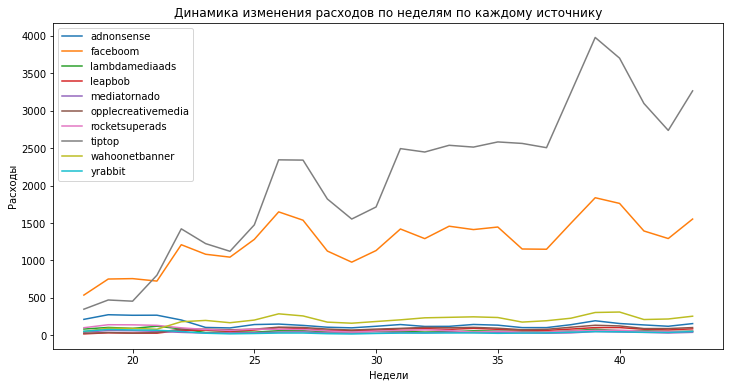

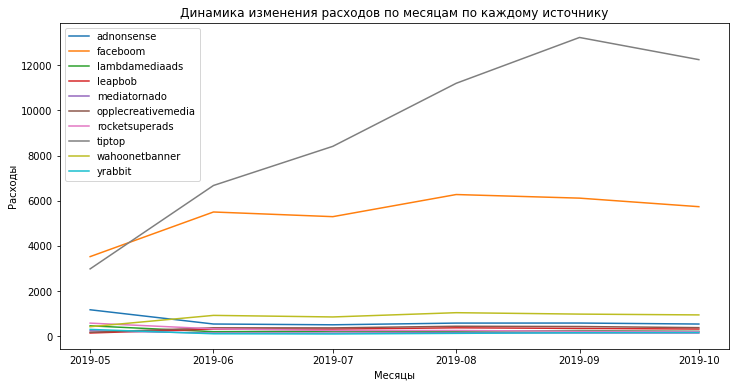

In [42]:
# Предварительная обработка данных
expenses_users['dt'] = pd.to_datetime(expenses_users['dt'])
expenses_users['month'] = pd.to_datetime(expenses_users['month'])
weekly_expenses = expenses_users.groupby(['channel', 'week'])['acquisition_cost'].sum().reset_index()
monthly_expenses = expenses_users.groupby(['channel', 'month'])['acquisition_cost'].sum().reset_index()

# Построение графиков по неделям
plt.figure(figsize=(12, 6))
for channel in weekly_expenses['channel'].unique():
    data = weekly_expenses[weekly_expenses['channel'] == channel]
    plt.plot(data['week'], data['acquisition_cost'], label=channel)
plt.xlabel('Недели')
plt.ylabel('Расходы')
plt.title('Динамика изменения расходов по неделям по каждому источнику')
plt.legend()
plt.show()

# Построение графиков по месяцам
plt.figure(figsize=(12, 6))
for channel in monthly_expenses['channel'].unique():
    data = monthly_expenses[monthly_expenses['channel'] == channel]
    plt.plot(data['month'], data['acquisition_cost'], label=channel)
plt.xlabel('Месяцы')
plt.ylabel('Расходы')
plt.title('Динамика изменения расходов по месяцам по каждому источнику')
plt.legend()
plt.show()

Рекламный бюджет рос постепенно от недели к неделе с периодическими просадками. Начиная приблизительно с 30й недели расходы на tiptop обогнали faceboom

3. Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [43]:
round(expenses_users.groupby('channel')['acquisition_cost'].mean().sort_values(),2)

channel
leapbob               0.21
mediatornado          0.22
yrabbit               0.22
opplecreativemedia    0.25
rocketsuperads        0.41
wahoonetbanner        0.60
lambdamediaads        0.72
adnonsense            1.01
faceboom              1.11
tiptop                2.80
Name: acquisition_cost, dtype: float64

Дороже всеего пользователь стоит в tiptop - 2,8р, дешевле всего leadbob - 0.21р.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

1. Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

Общие графики

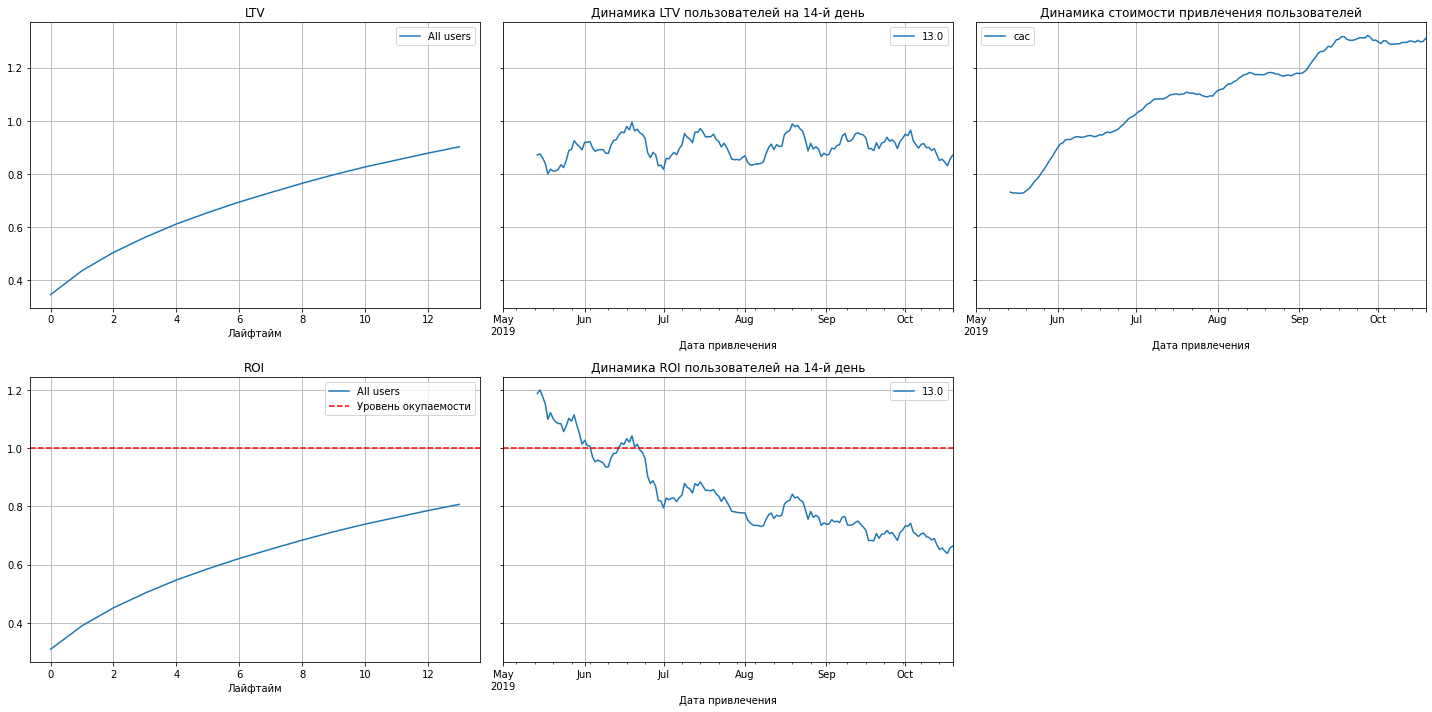

In [44]:
# Момент анализа
observation_date = datetime(2019, 11, 1).date()

# Горизонт анализа
horizon_days = 14

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    expenses_users, orders, observation_date, horizon_days
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

LTV в компаниях, как правило, постоянно растет. Если бы мы увидели падение, это бы означало, скорее всего, наличие ошибки в расчетах. Но на графике LTV стабилен. 
    
Стоимость привлечения пользователей (CAC) со временем увеличивалась; она окупалась только в мае-июне. CAC может быть какой угодно в зависимости, например, от того, какая цена рекламы была установлена.    

На графике явно видим, что реклама не окупается (ROI ниже единицы)

Графики в разбивке

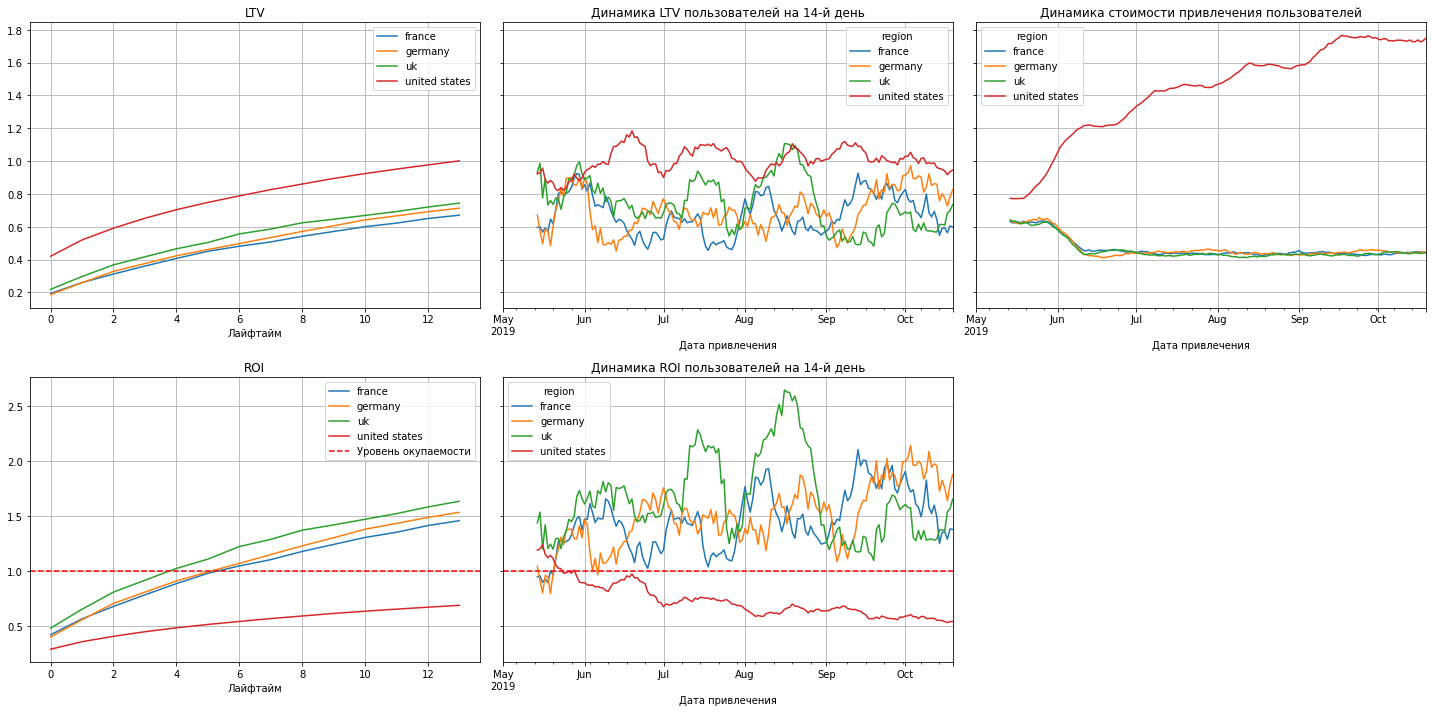

In [45]:
# Момент анализа
observation_date = datetime(2019, 11, 1).date()

# Горизонт анализа
horizon_days = 14

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    expenses_users, orders, observation_date, horizon_days, dimensions=['region']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

In [46]:
expenses_users.groupby('region')['user_id'].nunique().sort_values()

region
germany           9528
france           11058
uk               11154
united states    61829
Name: user_id, dtype: int64

US - лидер по LTV и стоимости привлечения, пользователи окупаются только на второй месяц. Остальные регионы окупаются на 6 день привлечения

CAC растет у США: реклама сильно дорожает. Остальные страны оптимизировали свои затраты.
    
Есть скачки ROI у Великобритании, при том что CAC стабилен. Стоит посмотреть на рекламные кампании в это время, возможно кампании были настроены лучше

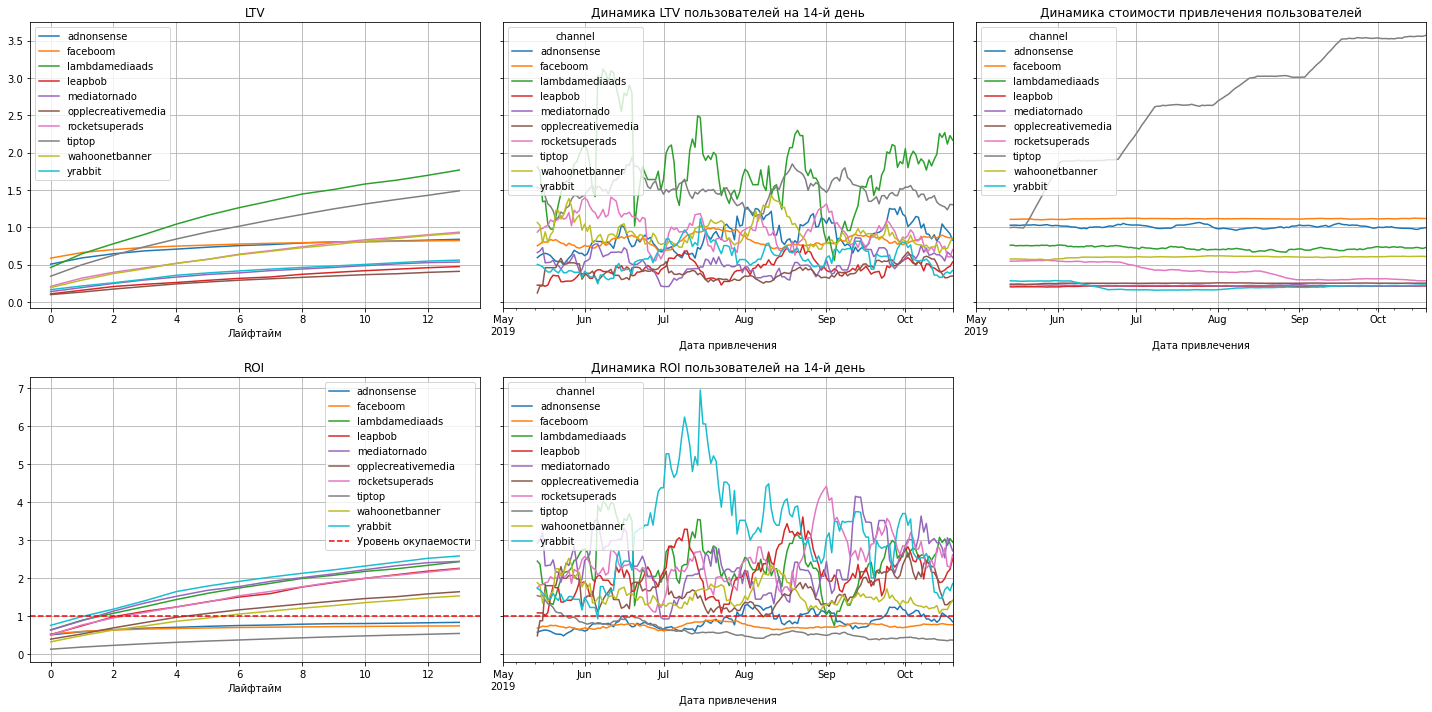

In [47]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    expenses_users, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

In [48]:
expenses_users.groupby('channel')['costs'].sum().sort_values()

channel
lambdamediaads          22304.80
mediatornado            25749.84
yrabbit                 26367.72
rocketsuperads          50786.71
leapbob                 96408.27
adnonsense             101199.00
opplecreativemedia     115732.75
wahoonetbanner         274956.60
faceboom              5670124.90
tiptop                6634745.90
Name: costs, dtype: float64

In [49]:
expenses_users.groupby('channel')['user_id'].nunique().sort_values()

channel
lambdamediaads         2149
adnonsense             3880
yrabbit                4312
mediatornado           4364
rocketsuperads         4448
leapbob                8553
wahoonetbanner         8553
opplecreativemedia     8605
tiptop                19561
faceboom              29144
Name: user_id, dtype: int64

Каналы tiptop, faceboom, adnonsense не окупаются за месяц, стоимость привлечения с каналов tiptiop значительно выше остальных. Остальные каналы работают хорошо и в среднем окупают себя на 6 день.

Лидерами по LTV являются lambdaMediaAds и TipTop. Не окупаются три канала. У канала TipTop стоимость привлечения пользователей заметно больше, чем у других каналов. Дорогая реклама приносит убыток компании. 

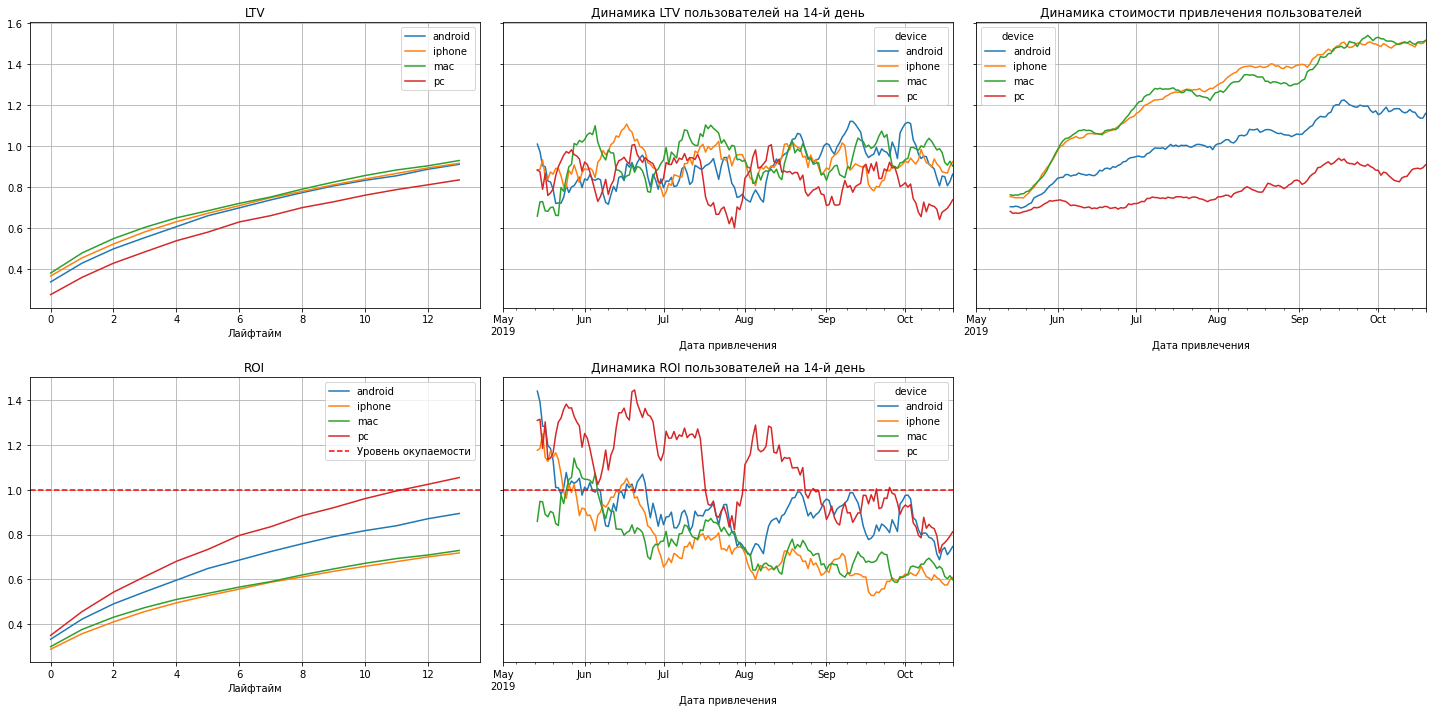

In [50]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    expenses_users, orders, observation_date, horizon_days, dimensions=['device']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Самый низкий CAC у ПК - окупается быстрее остальных. LTV практически у всех одинаковый. Качество приводимого трафика упало.
    
Android средний по стоимости привлечения, окупается чуть дольше ПК, качество трафика от месяца к месяцу растет. 
    
Apple устройства стоят дороже и дольше всех окупаются, качество приводимого трафика стабильно.
    
ROI заметно снижается от месяца к месяцу на всех устройствах пропорционально росту стоимости рекламы. 

Conversion rate

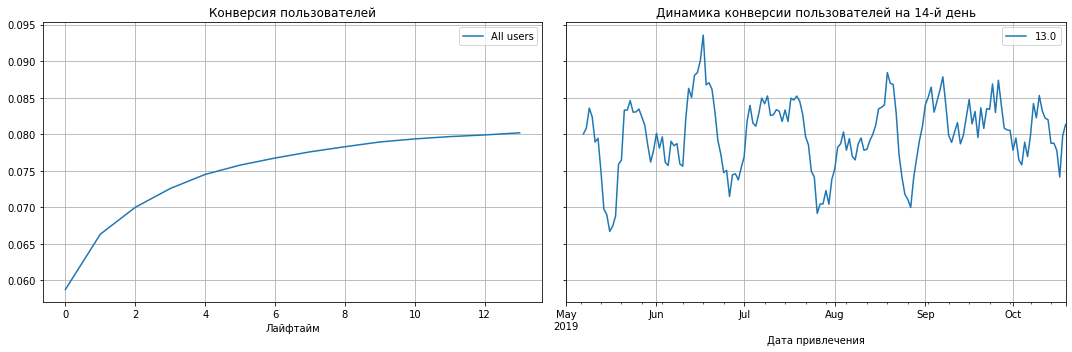

In [51]:
conversion_raw, conversion, conversion_history = get_conversion(
    expenses_users, orders, observation_date, horizon_days)

plot_conversion(conversion, conversion_history, horizon_days) 

Конверсия достигает уровня 8%

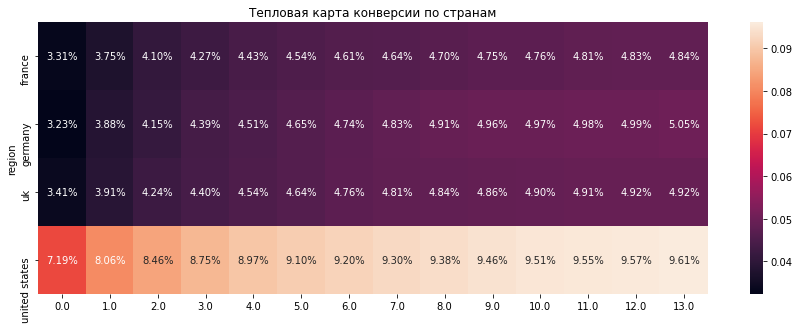

In [52]:
# получаем сырые данные, таблицу конверсии и таблицу динамики конверсии
conversion_raw, conversion, conversion_history = get_conversion(
    expenses_users, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)

# строим хитмэп по таблице конверсии
plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии по странам')
plt.show() 

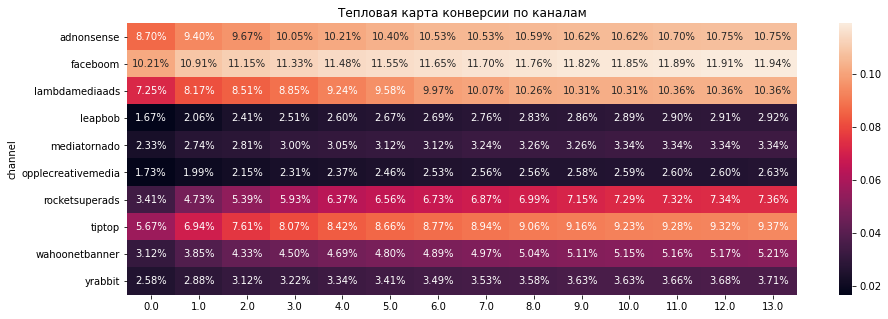

In [53]:
# получаем сырые данные, таблицу конверсии и таблицу динамики конверсии
conversion_raw, conversion, conversion_history = get_conversion(
    expenses_users, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

# строим хитмэп по таблице конверсии
plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии по каналам')
plt.show() 

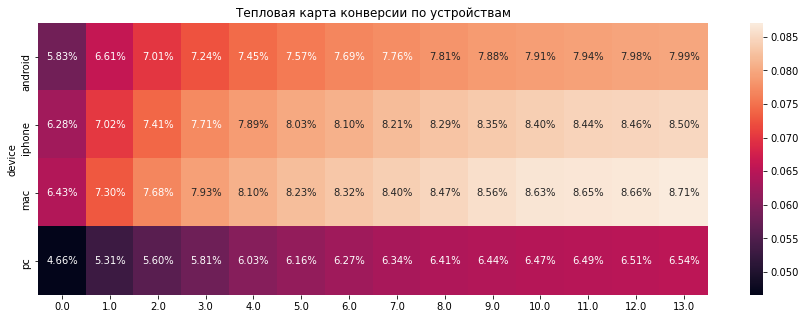

In [54]:
# получаем сырые данные, таблицу конверсии и таблицу динамики конверсии
conversion_raw, conversion, conversion_history = get_conversion(
    expenses_users, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

# строим хитмэп по таблице конверсии
plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии по устройствам')
plt.show() 

Лучше других конвертируются пользователи из США из каналов faceboom, adnonsense, lambdamediaads, tiptop. Низкая конверсия у opplecreativemedia, leapbob. Rocketsuperads показывает хороший результат на месячном сроке

Самая низкая конверсия у пользователей PC, самая высокая - Mac и iPhone. 
    
Конверсия в США существенно больше, чем в других странах. 
    
FaceBoom и AdNonSense лидируют. 

Retention Rate

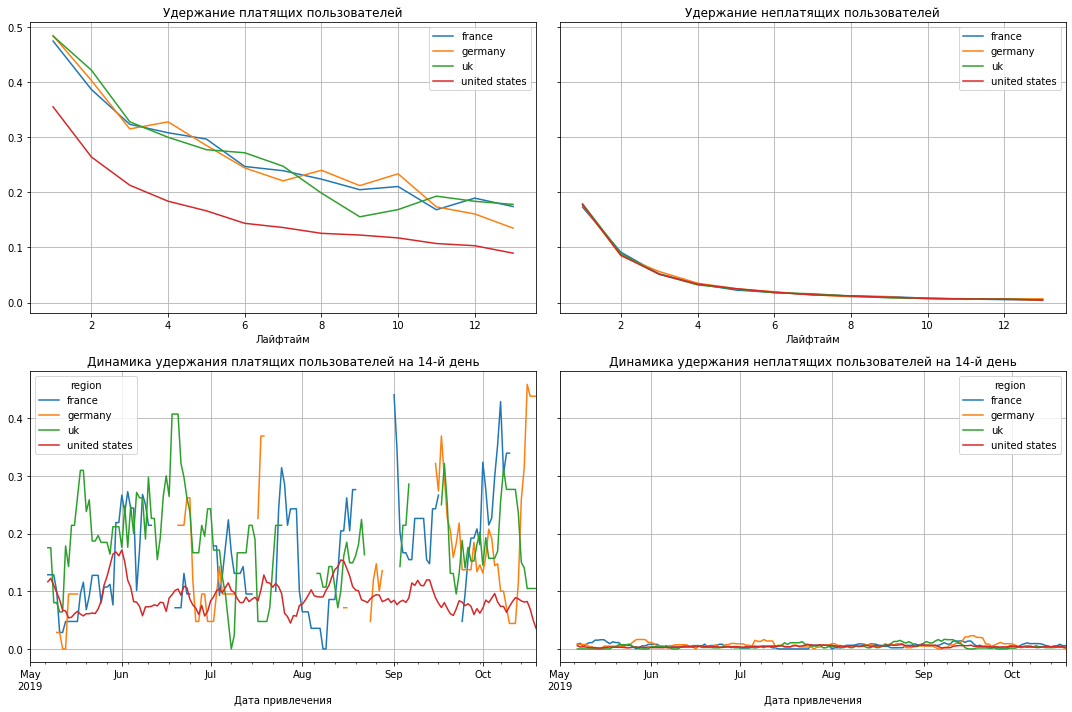

In [55]:
observation_date = datetime(2019, 11, 1).date()

horizon_days = 14

retention_raw, retention, retention_history = get_retention(
    expenses_users, sessions, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention, retention_history, horizon_days, window=7)

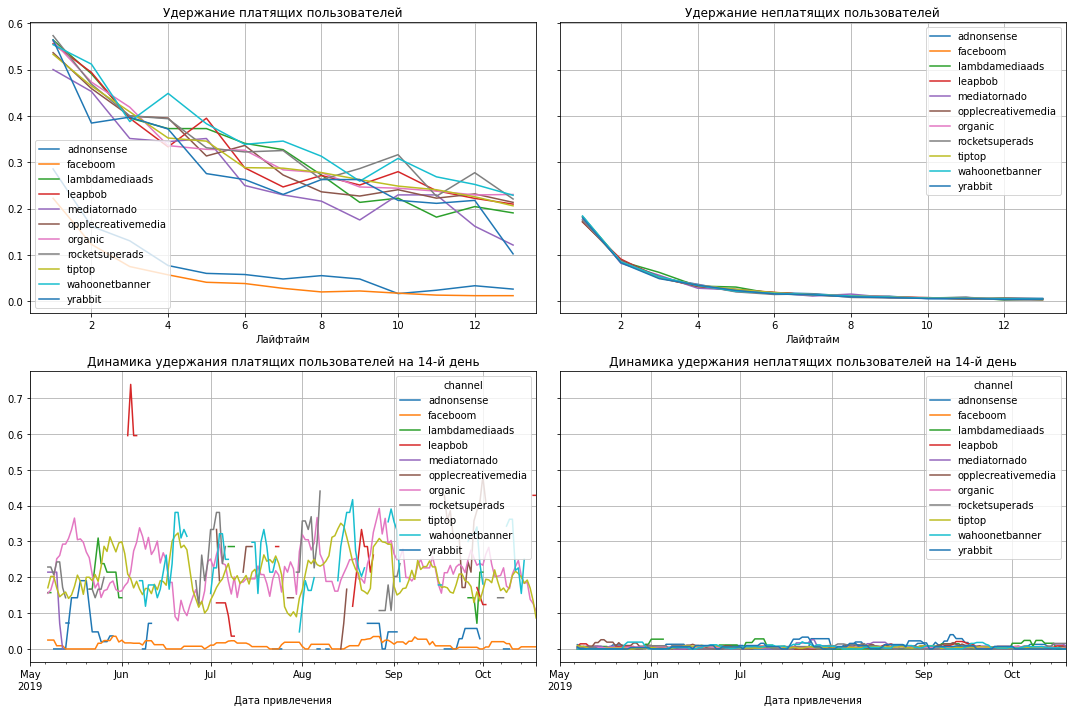

In [56]:
observation_date = datetime(2019, 11, 1).date()

horizon_days = 14

retention_raw, retention, retention_history = get_retention(
    users_profile, sessions, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention, retention_history, horizon_days, window=7)

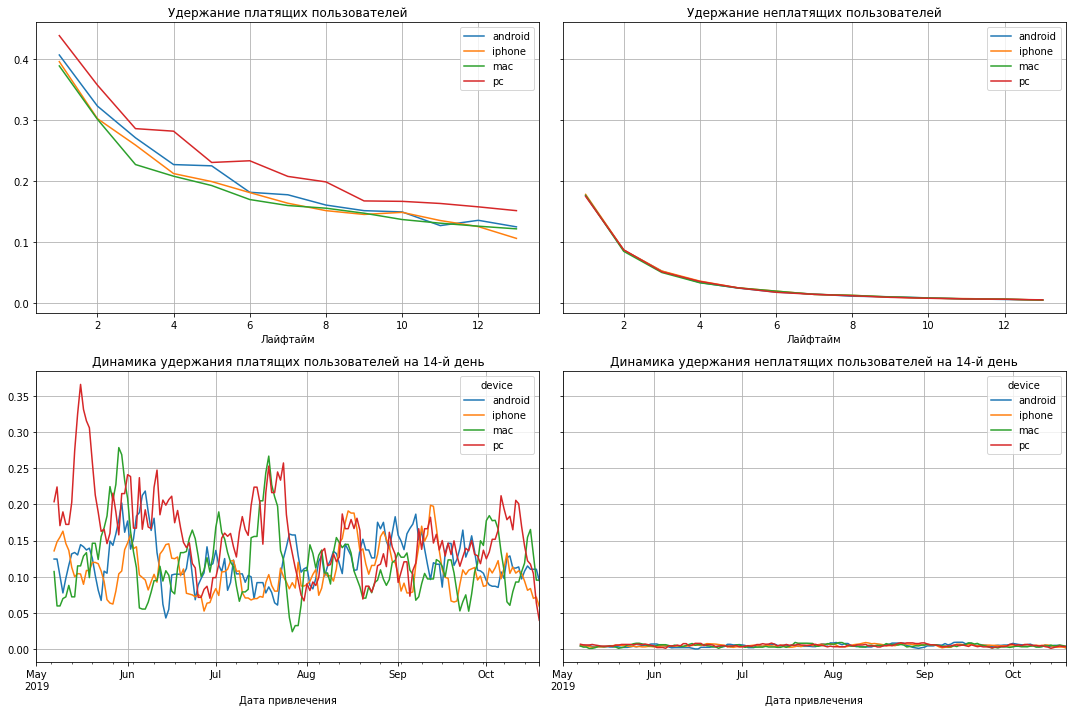

In [57]:
observation_date = datetime(2019, 11, 1).date()

horizon_days = 14

retention_raw, retention, retention_history = get_retention(
    users_profile, sessions, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention, retention_history, horizon_days, window=7)

Удержание платящих чуть выше у PC. США по удержанию занимают последнее место.

У FaceBoom и AdNonSense есть проблема "дырявого ведра", когда пользователи уходят из приложения в бóльших масштабах, чем ожидается. Новые пользователи, пришедшие из этих каналов, слабо конвертируются в постоянных клиентов. TipTop, отличающийся дорогой рекламой, по удержанию не выделяется на общем фоне. Качество аудитории в разных каналах различается. Может играть роль и фактор самого канала, в какой момент и как именно он цепляет внимание пользователя. Чтобы улучшить метрики в целом, важно развивать те каналы, которые позволяет эффективнее доносить ценность продукта.

Рассмотрю США отдельно, т.к. клиенты составляют основную долю рынка

In [58]:
usa_users_profile = users_profile.query("region == 'united states'").reset_index(drop=True)

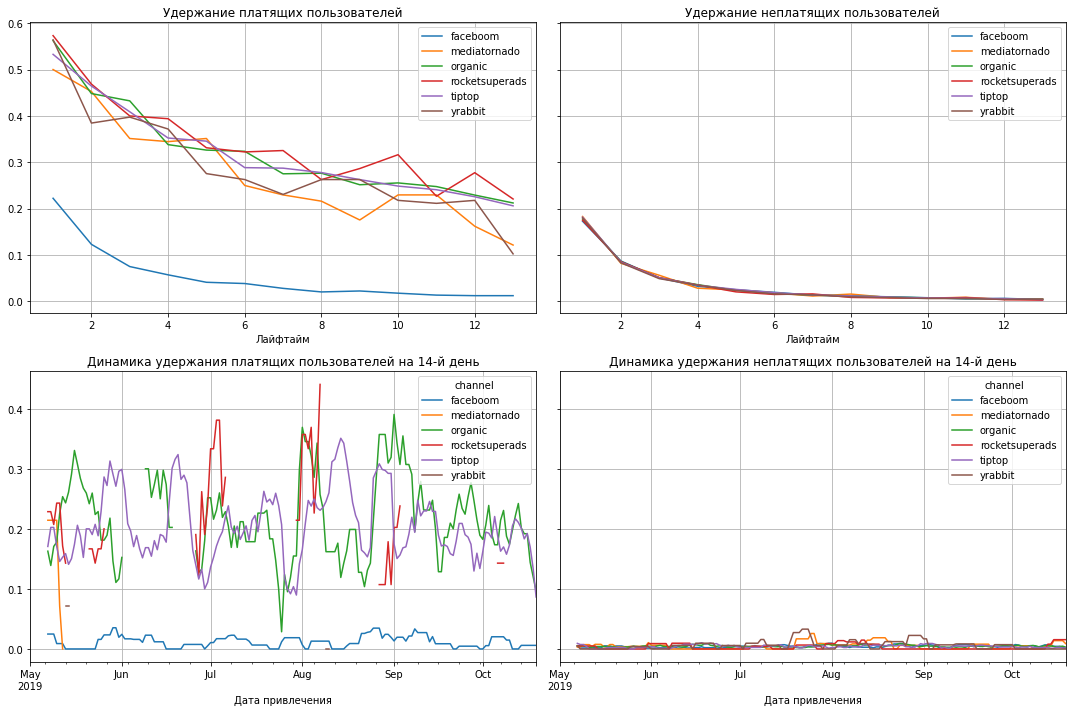

In [59]:
observation_date = datetime(2019, 11, 1).date()

horizon_days = 14

retention_raw, retention, retention_history = get_retention(
    usa_users_profile, sessions, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention, retention_history, horizon_days, window=7)

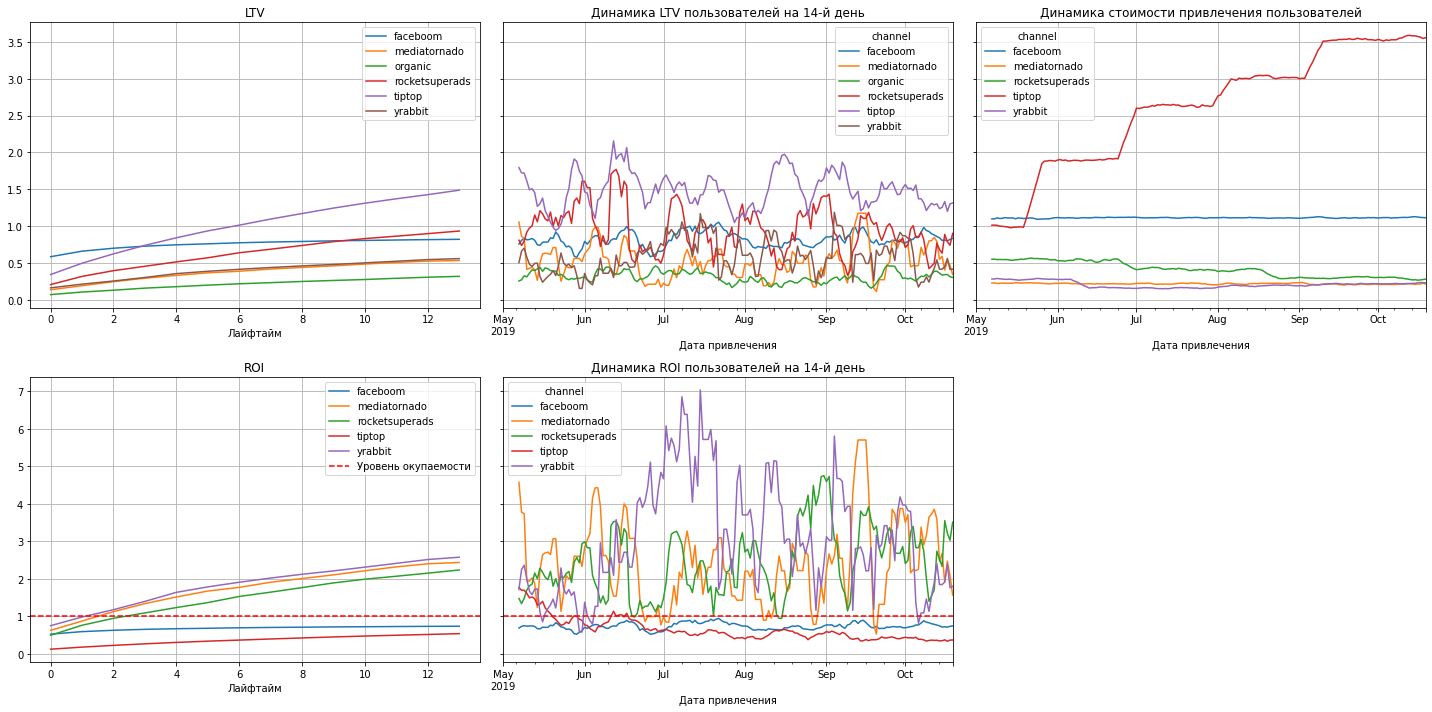

In [60]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    usa_users_profile, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7
)

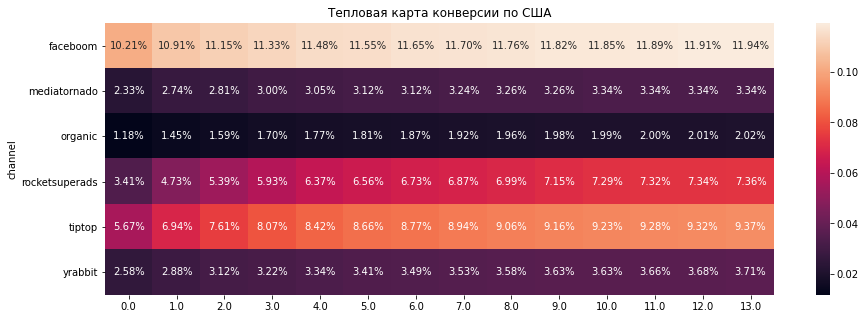

In [61]:
# получаем сырые данные, таблицу конверсии и таблицу динамики конверсии
conversion_raw, conversion, conversion_history = get_conversion(
    usa_users_profile, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

# строим хитмэп по таблице конверсии
plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии по США')
plt.show() 

Для США рекомендую перераспределить бюджет в пользу канала rocketsuperads: показывает хорошую конверсию и удержание, относительно недорогой и окупается

Общие расчеты

In [62]:
orders['user_id'].nunique() # Общее количество привлеченных клиентов

8881

In [63]:
expenses_users['acquisition_cost'].median() # Средний доход с одного клиента

1.0805309734513273

In [64]:
average_customer_lifetime = (expenses_users['dt'] - expenses_users['month']).median()
average_customer_lifetime # Лайфтайм средний

Timedelta('15 days 00:00:00')

In [65]:
total_marketing_costs = 105497   # Общие затраты на маркетинг
total_customers_acquired = 8881  # Общее количество привлеченных клиентов
average_revenue_per_customer = 1.08  # Средний доход с одного клиента
average_customer_lifetime_days = 15  # Средняя продолжительность жизни клиента в днях

# Переводим среднюю продолжительность жизни клиента в месяцы
average_customer_lifetime_months = average_customer_lifetime_days / 30

cac = total_marketing_costs / total_customers_acquired
ltv = average_revenue_per_customer * average_customer_lifetime_months

if cac < ltv:
    print("Бизнес окупается успешно: CAC меньше LTV")
else:
    print("Бизнес может столкнуться с проблемами окупаемости: CAC больше LTV")

Бизнес может столкнуться с проблемами окупаемости: CAC больше LTV


### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**Выводы:**    
    
Затраты на рекламу не окупаются за 14 дней, есть убыточные каналы: tiptop, faceboom, adnonsense, сильный перекос бюджета в сторону tiptop. 
    
Для США стоит пересобрать канал faceboom, так как он дает стабильно хорошую конверсию, но плохое удержание, есть предположение, что канал приводит нецелевой трафик. Tiptop слишком дорогой, его стоит оптимизировать по затратам, либо отключить. Также стоит сделать акцент на rocketsuperads: показывает хорошую конверсию, низкую стоимость рекламы, хорошее удержание. 
Из США больше всего платящих клиентов и дороже реклама. Может есть возможность повысить закупаемые объемы рекламы, чтобы как-то снизить ставку за привлеченного пользователя на хорошо конвертируемых каналах с хорошим удержанием.
       
Для других регионов усилить помимо rocketsuperads усилить lambdamediaads: показывает хорошую конверсию, низкую стоимость рекламы, хорошее удержание. Также стоит попробовать пересобрать adnonsense: низкое удержание, нецелевые пользователи. 
    
Часть бюджета стоит распределить на каналы с низкой конверсией, но высокой окупаемостью: yrabbit.

Причина неэффективности маркетинга в некорректном распределении бюджетов на каналы.